In [242]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import math
import cmath

DFT_PATH = '../images/e8/new50.tiff'

def readImage(imagePath, imageName):
    # read the image
    image_original = mpimg.imread(imagePath)
    image = image_original.copy() # else it is read only

    if len(image.shape) == 3:
        # is a color image
        # converting to grayscale: avg method
        R = image[:,:, 0]
        G = image[:,:, 1]
        B = image[:,:, 2]
        grayscale = (R/3 + G/3 + B/3)
    else:
        # is a grayscale image
        grayscale = np.array(image_original.copy())

    plt.imshow(grayscale, cmap=plt.get_cmap('gray'),vmin=0, vmax=255)
    plt.title('Original ' + imageName)
    
    return grayscale



def convertToMag(dftMatrix):
    result = np.zeros(dftMatrix.shape)
    
    for x in range(dftMatrix.shape[0]):
        for y in range(dftMatrix.shape[1]):
            result[x, y] = abs(dftMatrix[x, y])
            
    return result

def preProcessImage(img):
    x_dims = img.shape[0]
    y_dims = img.shape[1]
    
    result = np.zeros((2*x_dims, 2*y_dims))
    result[:x_dims,:y_dims] = img
        
    plt.imshow(result, cmap=plt.get_cmap('gray'),vmin=0, vmax=255)
    plt.title('Processed Image ')
        
    return result

def generateDFT(grayImage):

    result = []
    
    x_dims = grayImage.shape[0]
    y_dims = grayImage.shape[1]
    #print('x_dims (u) =', x_dims, 'y_dims (v) =', y_dims)

    for u in range(x_dims):
        tempList = []
        for v in range(y_dims):
            tempSum = complex(0, 0)
            
            for x in range(x_dims):
                for y in range(y_dims):
                    theta = -2*math.pi* ( (u*x/x_dims)  + (v*y/y_dims) )
                    tempSum = tempSum + grayImage[x, y]*cmath.exp(complex(0, theta))
                    
            tempList.append(tempSum)
        
        #tempList = (1/complex(0, x_dims)) * tempList
        #print(tempList)
        result.append(tempList)
        #print('Finished u =', u, 'v =', v)

    result = (1/x_dims)*np.array(result)
    

    plt.imshow(convertToMag(result), cmap=plt.get_cmap('gray'))
    plt.title('DFT magnitude plot')
    
    return result


def generateIDFT(dft):
    result = []
    
    x_dims = dft.shape[0]
    y_dims = dft.shape[1]
    #print('x_dims (u) =', x_dims, 'y_dims (v) =', y_dims)

    for u in range(x_dims):
        tempList = []
        for v in range(y_dims):
            tempSum = complex(0, 0)
            
            for x in range(x_dims):
                for y in range(y_dims):
                    theta = 2*math.pi* ( (u*x/x_dims)  + (v*y/y_dims) )
                    tempSum = tempSum + dft[x, y]*cmath.exp(complex(0, theta))
                    
            tempList.append(tempSum)
        
        #tempList = (1/complex(0, x_dims)) * tempList
        #print(tempList)
        result.append(tempList)
        #print('Finished u =', u, 'v =', v)

    result = (1/x_dims)*np.array(result)
    

    plt.imshow(convertToMag(result), cmap=plt.get_cmap('gray'))
    plt.title('IDFT plot')
    
    return result


# log s = c * log(1+r)
def logTransform(grayImage ,c):
    log_image = c * np.log10(grayImage + 1.0000000000001) # needed to avoid log(1) = 0 error
    plt.imshow(log_image, cmap='gray')
    plt.title('log transform with c = ' + str(c))
    
    
def centerTransform(img):
    result = np.zeros(img.shape)
    
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            result[x, y] = ( (-1)**(x+y) ) * img[x,y]

    return result



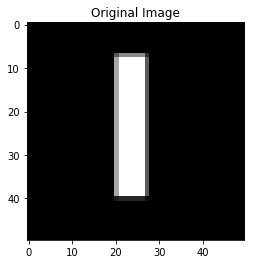

In [243]:
img1 = readImage(DFT_PATH, "Image")

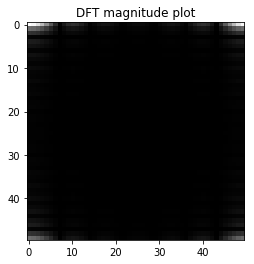

In [244]:
dft = generateDFT(img1)

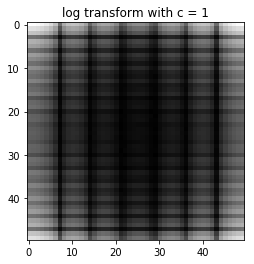

In [245]:
# applying log to highlight hidden features
logTransform(convertToMag(dft), 1)

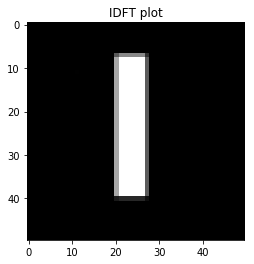

In [246]:
idft = generateIDFT(dft)